**Titanic dataset**

Worked on the most popular dataset in Kaggle, predicting which passengers would survive the Titanic sinking.

Final model used to make predictions for which passengers would survive the crash; the results are saved in Titanic_Predictions.csv.

All coding done manually for this project; hence, time to complete was about two hours.

**August 12, 2025 Update**

Re-pruned and re-tuned the Decision Tree and Random Forest models to try and squeeze out more accuracy.

Re-pruning the Decision Tree reduced accuracy to 74%, so I focused on the Random Forest model.

Re-tuning the Random Forest model increased accuracy from 82% to 83%; subsequently, running the model against the actual Titanic survival data yielded improvement from 88.44% to 89.56%.

Estimated time for re-pruning, re-tuning, and running new models: 30 minutes.

In [1]:
#importing necessary libraries (I prefer to do them all at the start)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score, accuracy_score
from sklearn import tree


# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
data=pd.read_csv(r'C:\Users\rober\Documents\Data Science\Code (all)\Portfolio\Kaggle projects\Datasets\titanic_train.csv') #importing dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [7]:
data['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

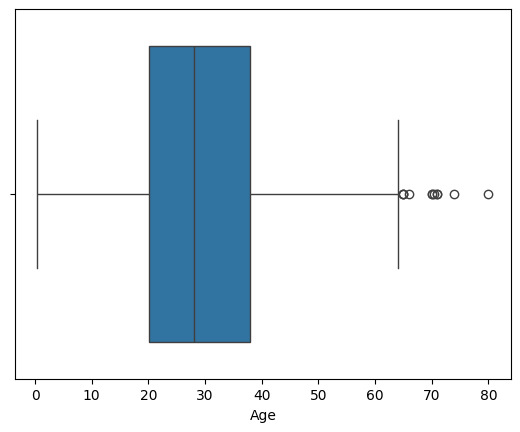

In [8]:
sns.boxplot(data, x='Age');

In [9]:
num_cols=data.select_dtypes(include=np.number).columns
num_cols

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [10]:
cat_cols=data.select_dtypes(include='object').columns
cat_cols

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [11]:
cat_cols=cat_cols.drop('Name')
num_cols=num_cols.drop('PassengerId')

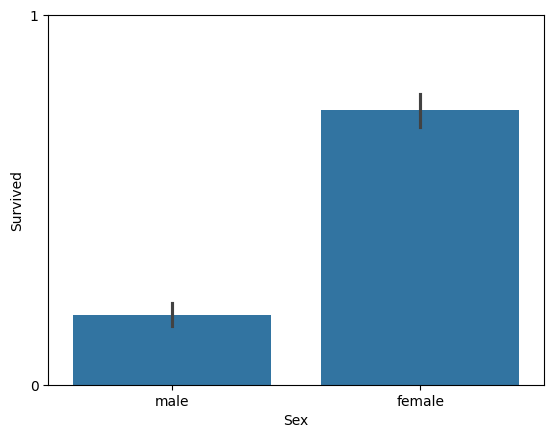

In [12]:
sns.barplot(data=data, x='Sex', y='Survived')
plt.yticks([0,1])
plt.show()

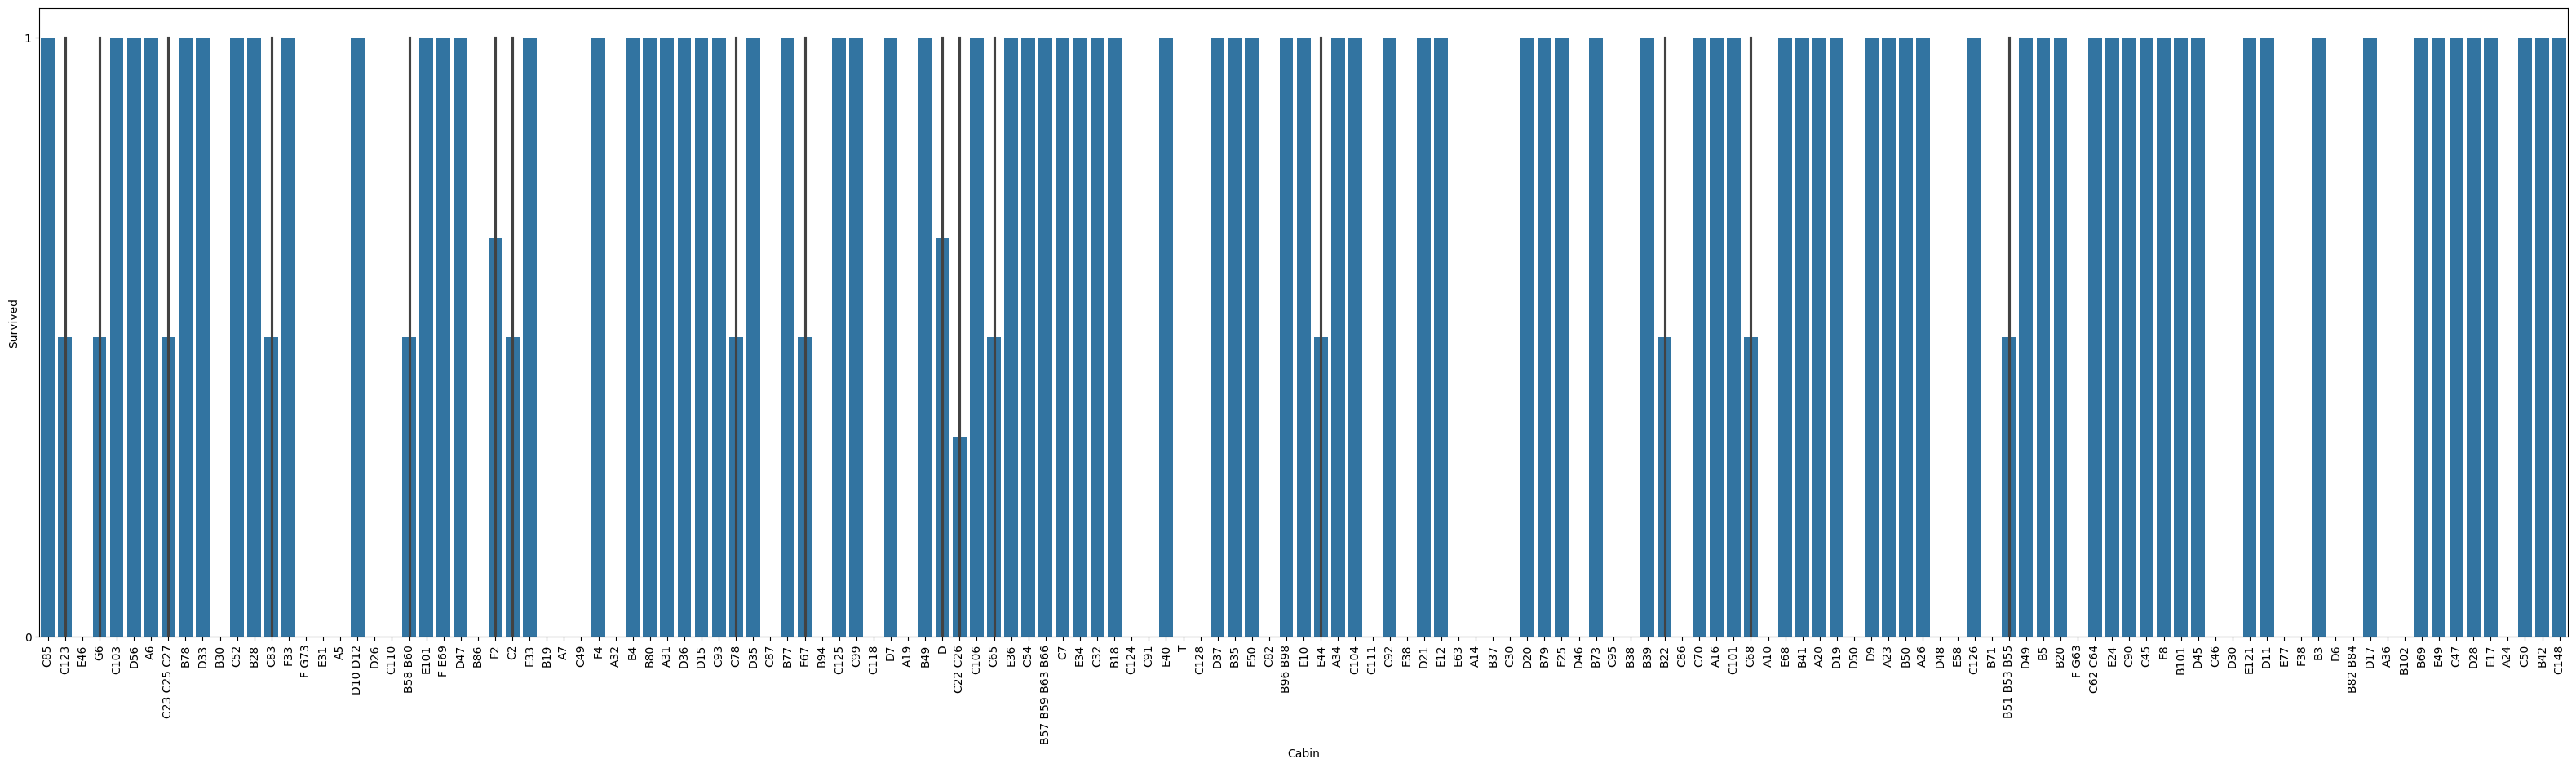

In [13]:
plt.figure(figsize=(40,10))
plt.xticks(rotation=90)
plt.yticks([0,1])
sns.barplot(data=data, x='Cabin', y='Survived');

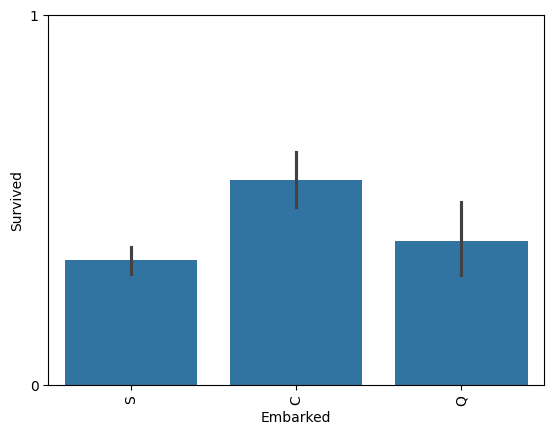

In [14]:
plt.xticks(rotation=90)
sns.barplot(data=data, x='Embarked', y='Survived')
plt.yticks([0,1]);

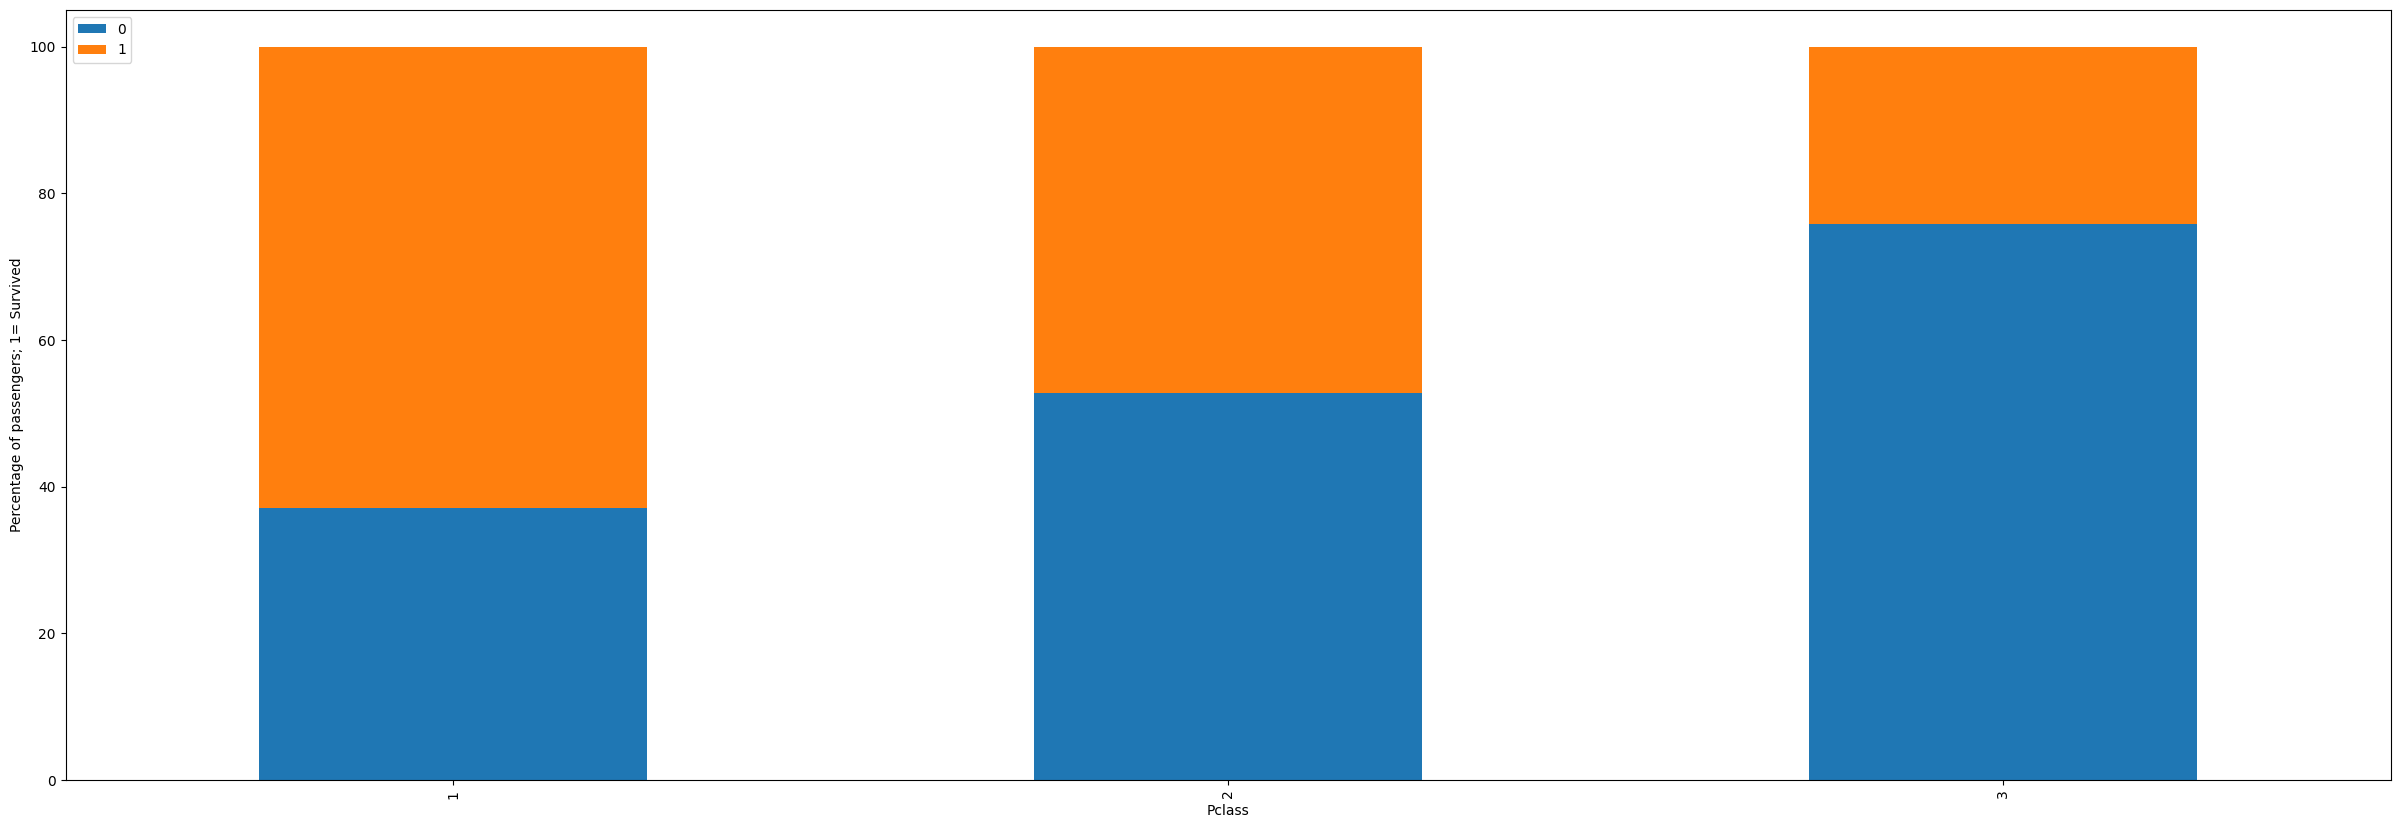

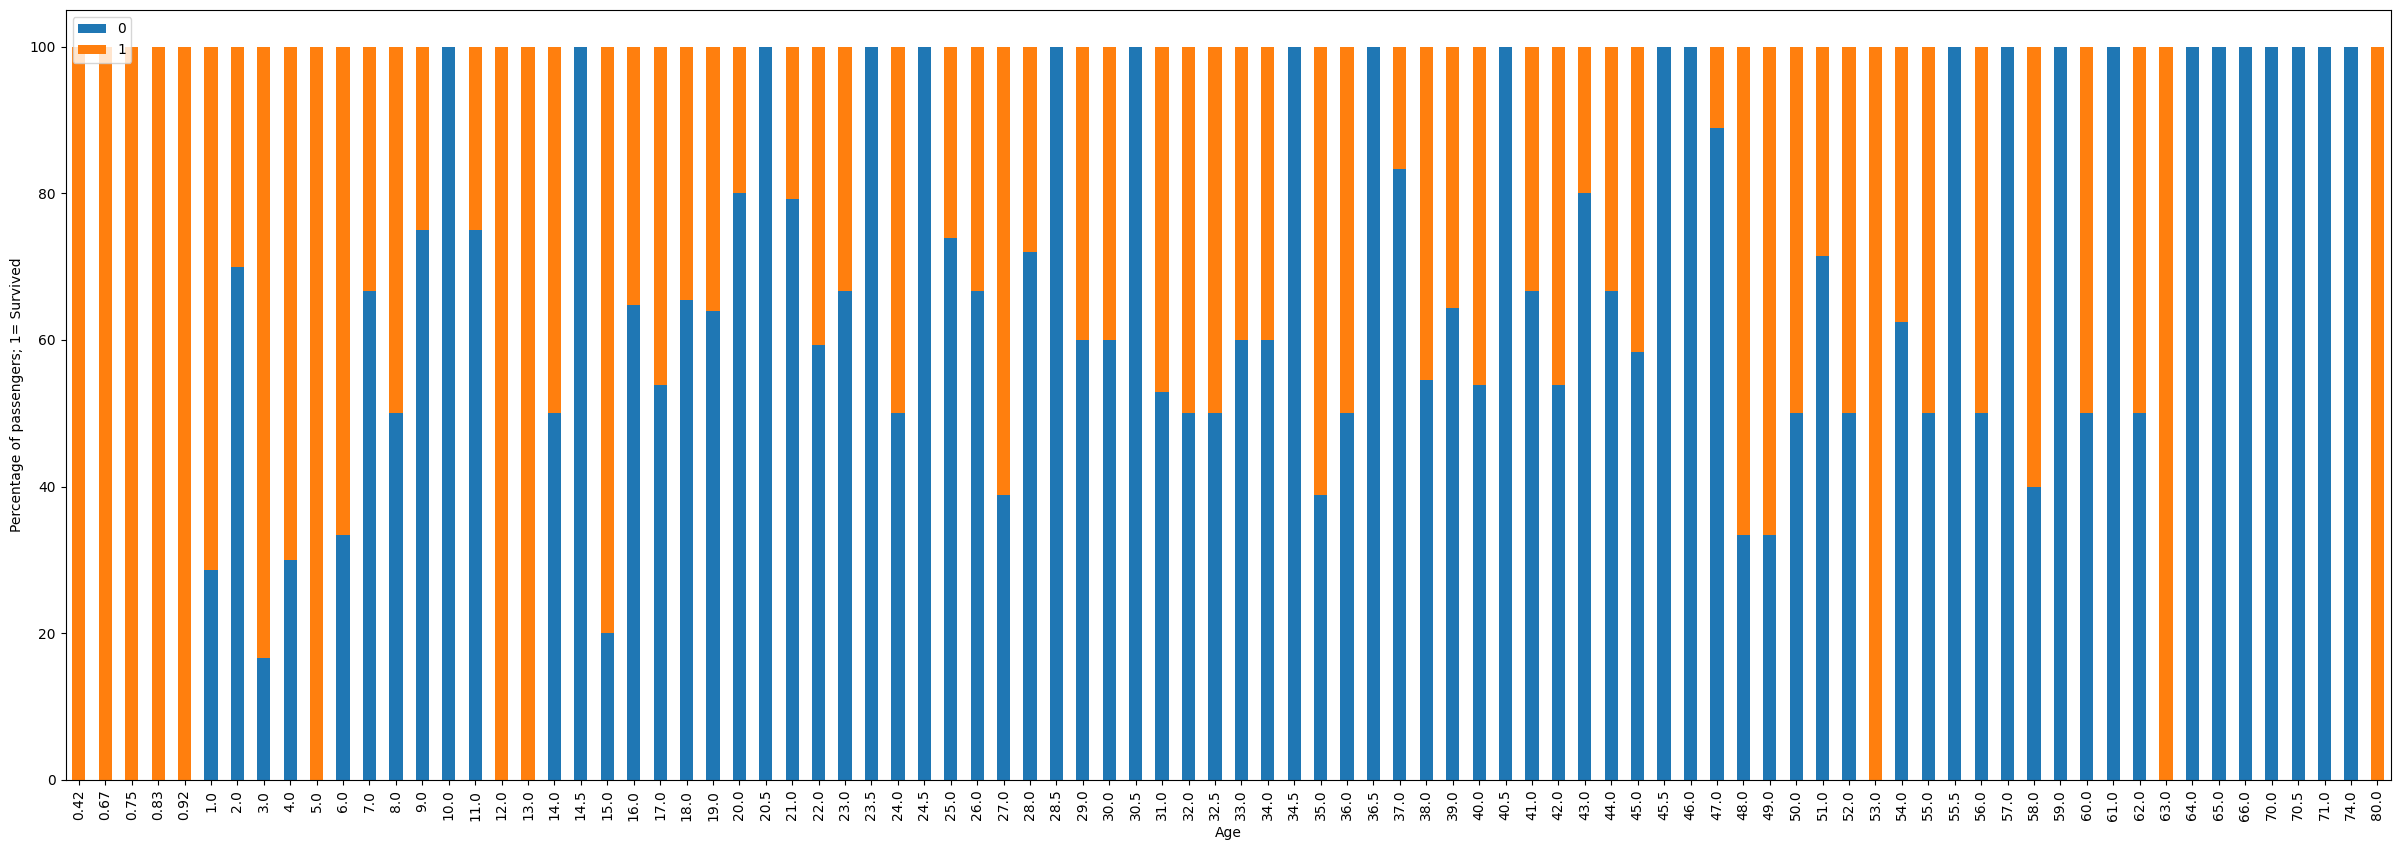

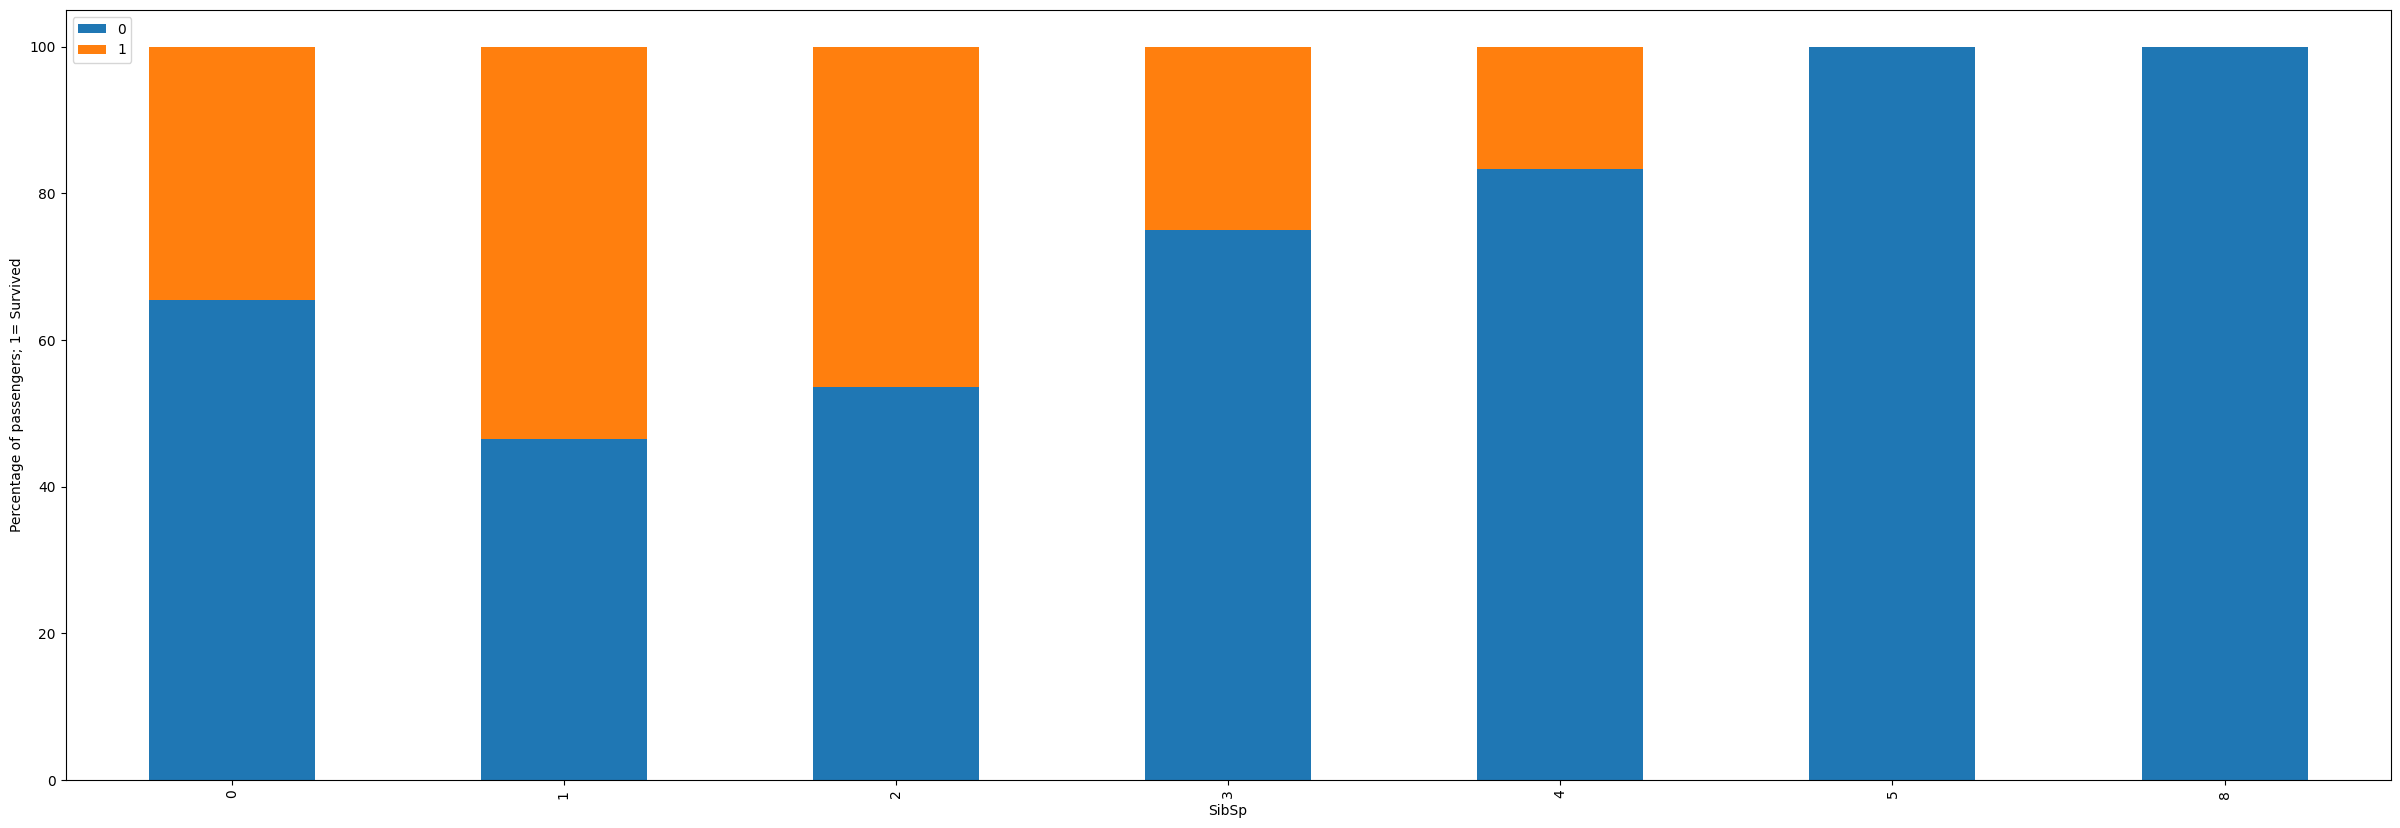

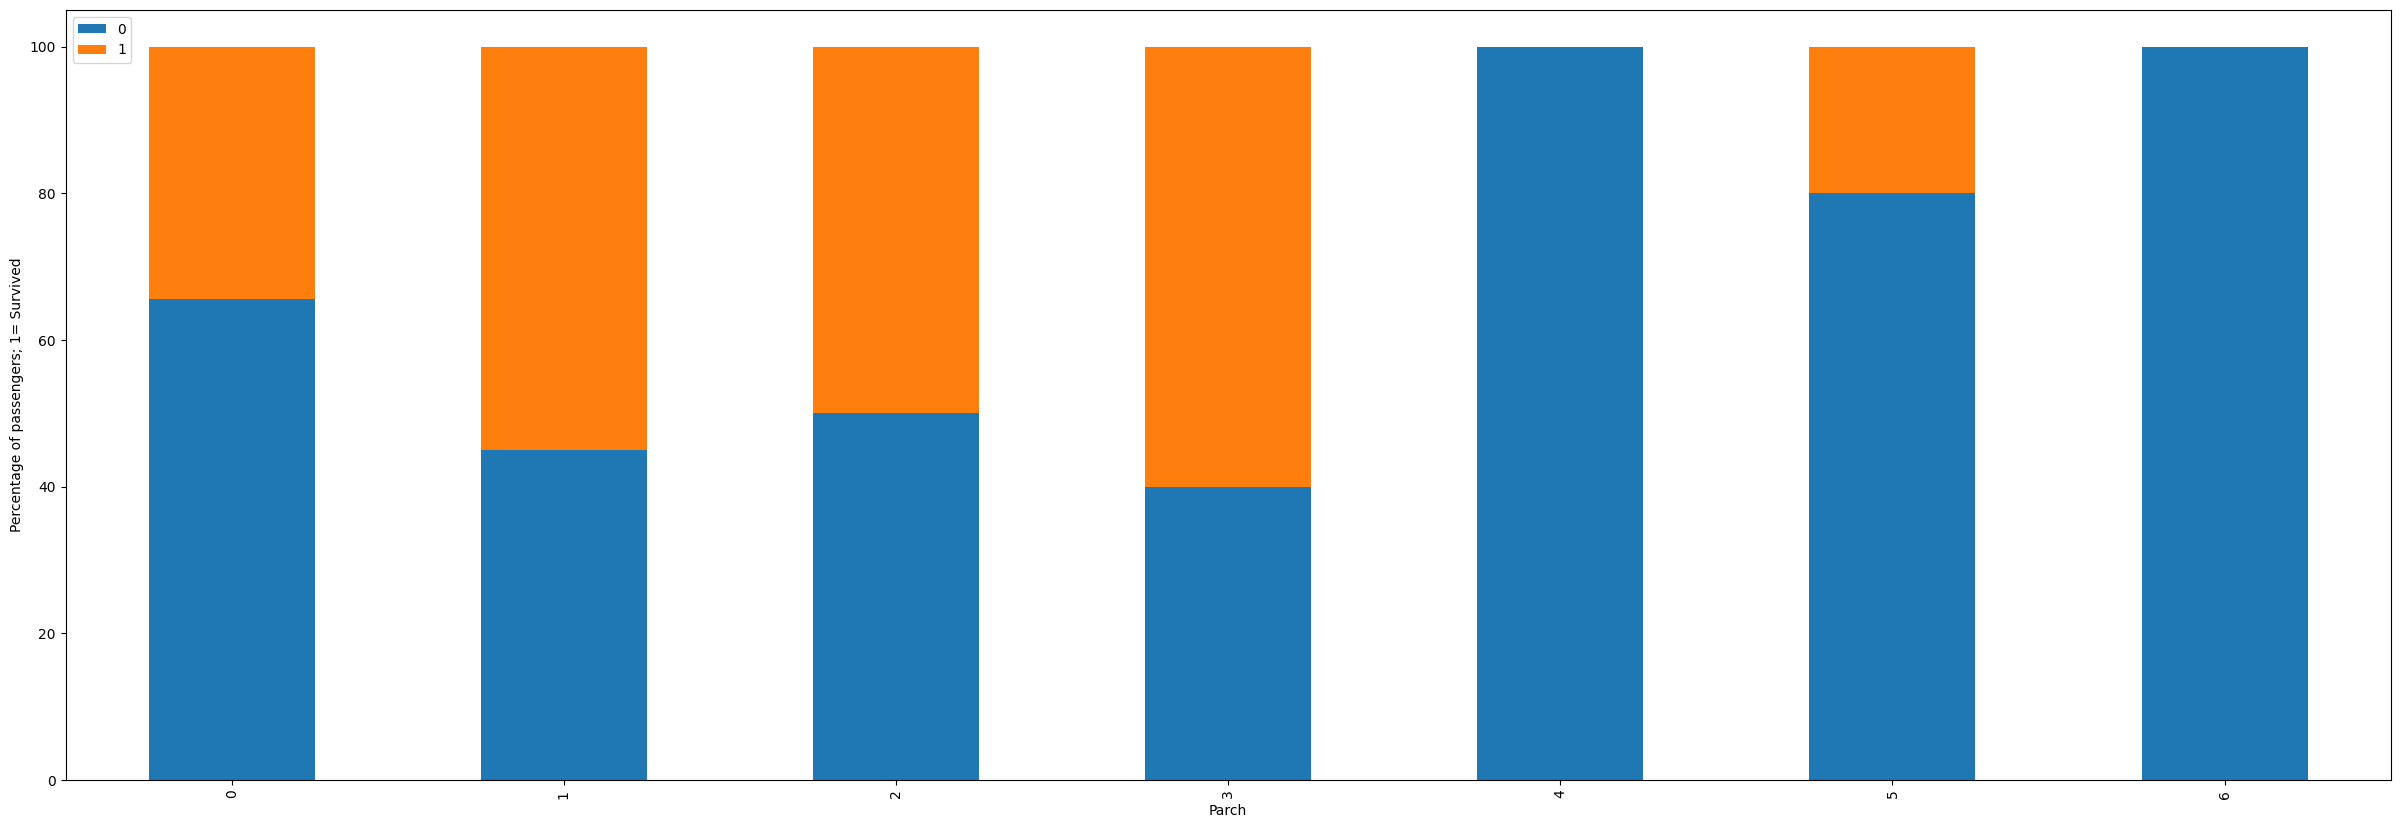

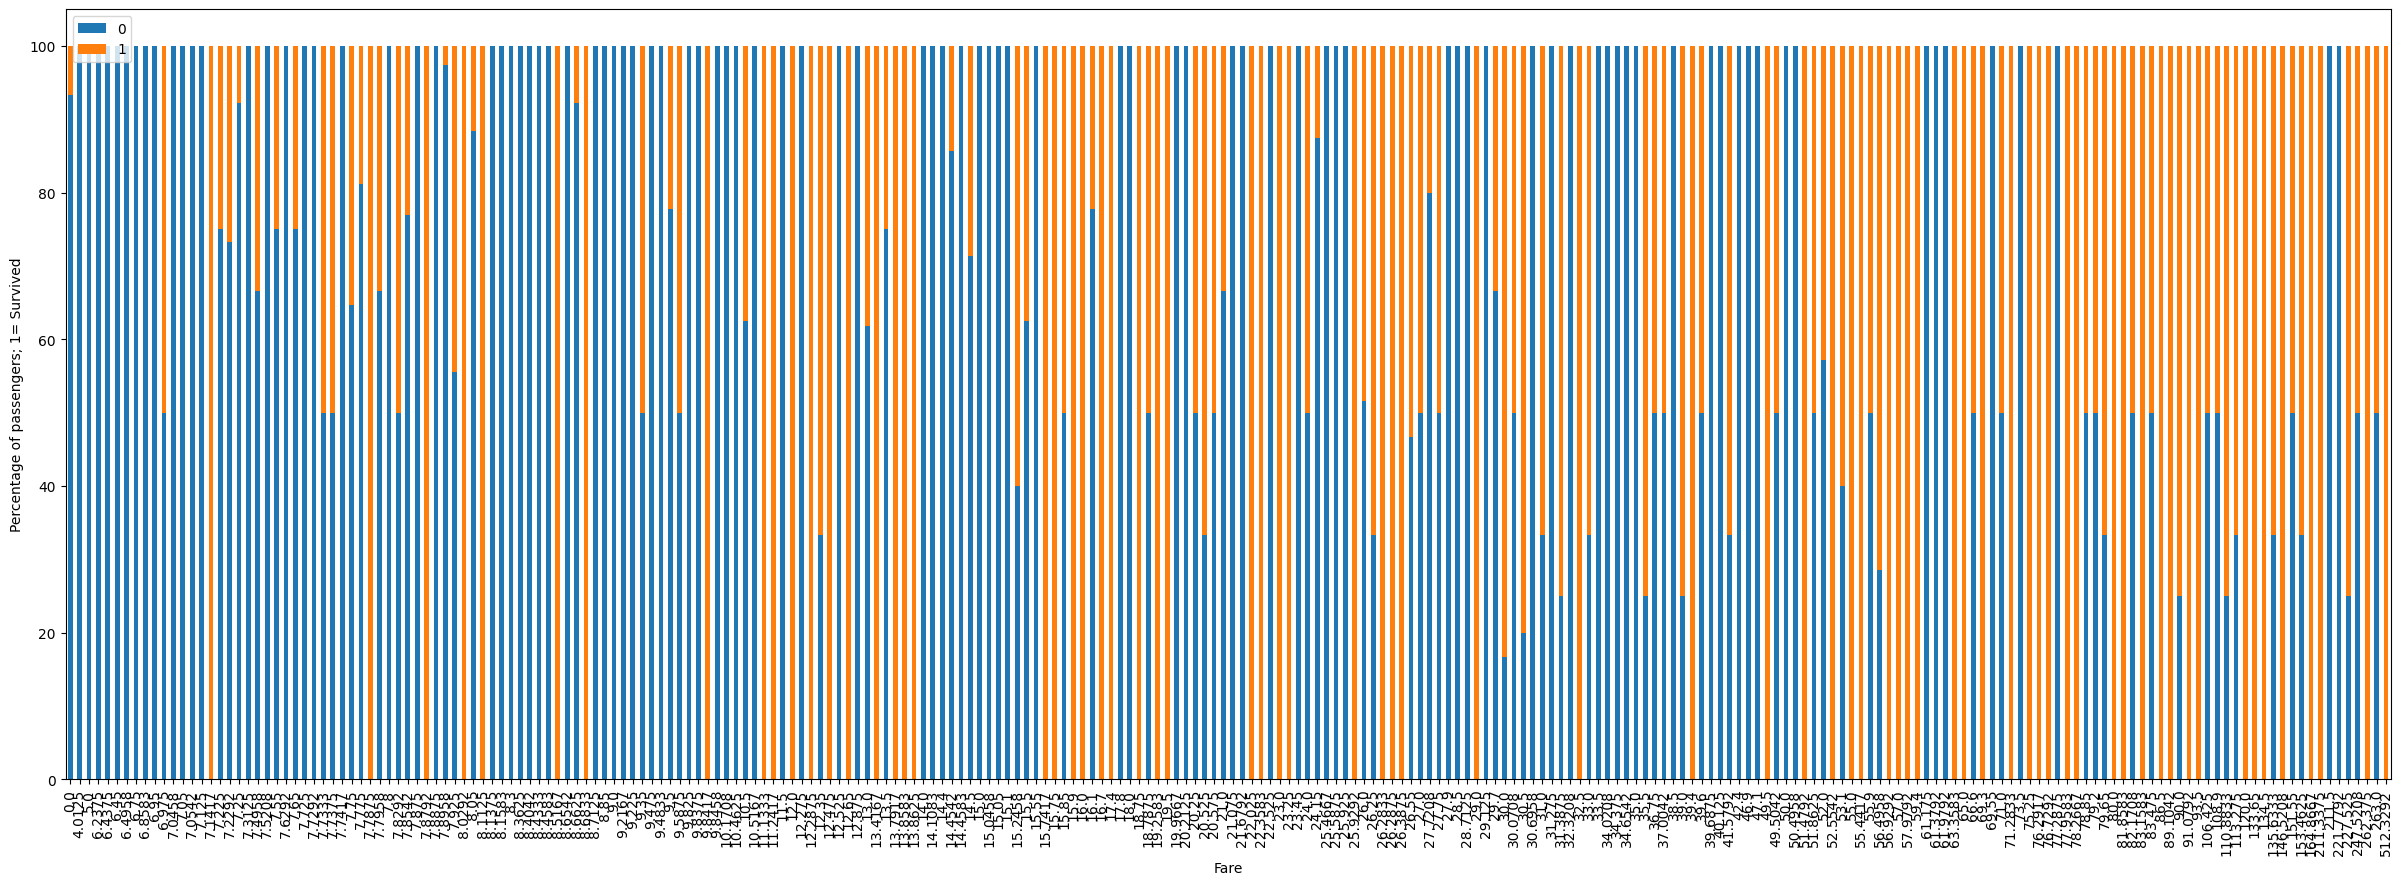

In [15]:
#showing ratio of paid customers to individual discrete columns

for i in num_cols:
    if i!='Survived':
        (pd.crosstab(data[i],data['Survived'],normalize='index')*100).plot(kind='bar',figsize=(30,10), stacked=True)
        plt.legend(loc='upper left')
        plt.ylabel('Percentage of passengers; 1= Survived')
        plt.show()

In [16]:
#Index(['Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [17]:
data['Sex'].replace({'male':0,'female':1},inplace=True)

In [18]:
data['Cabin'].replace({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'T':7},inplace=True)
data['Embarked'].replace({'S':0,'C':1,'Q':2},inplace=True)

In [19]:
data.drop('Ticket',axis=1, inplace=True)
data.drop('Name', axis=1, inplace=True)

In [20]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,7.2500,NaN,0.0
1,2,1,1,1,38.0,1,0,71.2833,C85,1.0
2,3,1,3,1,26.0,0,0,7.9250,NaN,0.0
3,4,1,1,1,35.0,1,0,53.1000,C123,0.0
4,5,0,3,0,35.0,0,0,8.0500,NaN,0.0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     889 non-null    float64
dtypes: float64(3), int64(6), object(1)
memory usage: 69.7+ KB


In [22]:
data_corr=data.drop('Cabin', axis=1)

In [23]:
data_corr=data_corr.drop('PassengerId', axis=1)
data_corr=data_corr.corr()

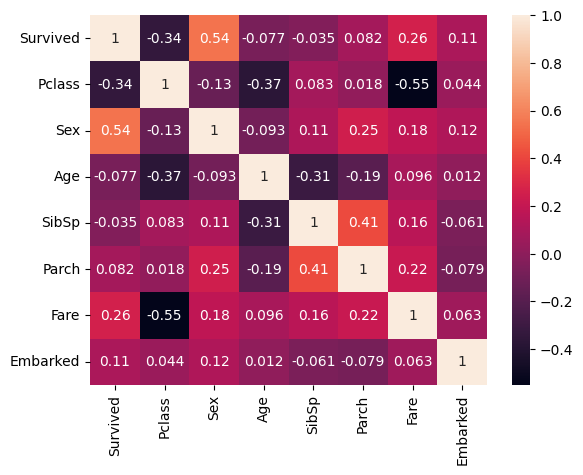

In [24]:
sns.heatmap(data_corr, annot=True);

**Observations**

Sex, Pclass, and Fare have the highest correlation with surviving.

In [25]:
#setting up independent and dependent variables
Y=data.Survived
X=data.drop(['Survived','Cabin'], axis=1)

In [26]:
#splitting data into testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [27]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight = {0: 0.384, 1: 0.616}, random_state = 42)

In [28]:
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,"{0: 0.384, 1: 0.616}"


In [29]:
#for confusion matrix, precision, recall, etc.
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Did not Survive', 'Survived'], yticklabels=['Did not Survive', 'Survived'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

Accuracy:  0.9985955056179775


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       439
           1       1.00      1.00      1.00       273

    accuracy                           1.00       712
   macro avg       1.00      1.00      1.00       712
weighted avg       1.00      1.00      1.00       712



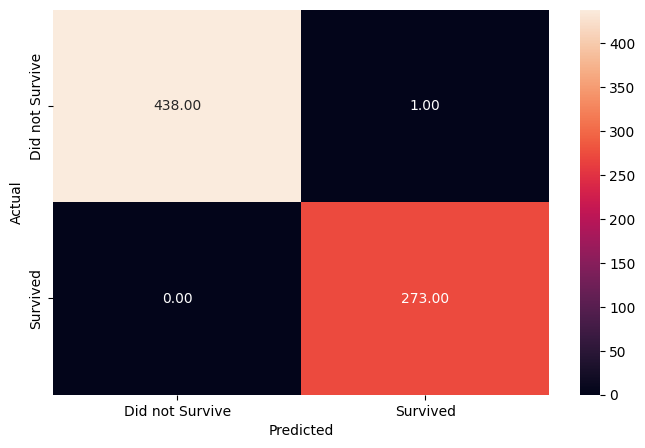

None


In [30]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(X_train)

print ("Accuracy: ", accuracy_score(y_train, y_train_pred_dt))
print("\n")
print (metrics_score(y_train, y_train_pred_dt))

Accuracy:  0.7430167597765364


              precision    recall  f1-score   support

           0       0.80      0.77      0.79       110
           1       0.66      0.70      0.68        69

    accuracy                           0.74       179
   macro avg       0.73      0.73      0.73       179
weighted avg       0.75      0.74      0.74       179



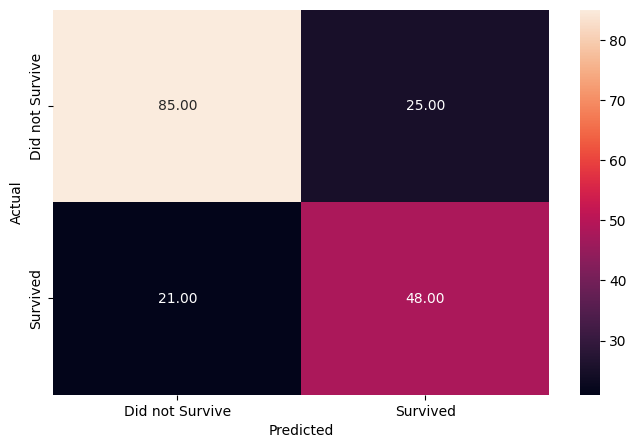

None


In [31]:
#visualizing precision, accuracy, etc. for testing dataset
y_test_pred_dt = dt.predict(X_test)

print ("Accuracy: ", accuracy_score(y_test, y_test_pred_dt))
print("\n")
print (metrics_score(y_test, y_test_pred_dt))

In [32]:
# Training the unpruned tree
clf = DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(X_train, y_train)

In [33]:
#grabbing candidate alphas
ccp_alphas = path.ccp_alphas

In [34]:
#Train a tree for each alpha and evaluate
clfs = []
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [35]:
#Pick the one with best precision on the test set
from sklearn.metrics import precision_score
precisions = [precision_score(y_test, clf.predict(X_test), average='macro') for clf in clfs]

In [36]:
#Choose the best tree
best_index = precisions.index(max(precisions))
best_clf = clfs[best_index]
print(f"Best ccp_alpha: {ccp_alphas[best_index]}")
print("Best precision:", precisions[best_index])

Best ccp_alpha: 0.020229217982027037
Best precision: 0.8395599833955998


In [37]:
#getting test results
y_pred_prune= best_clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.74      0.98      0.84       110
           1       0.94      0.45      0.61        69

    accuracy                           0.78       179
   macro avg       0.84      0.72      0.73       179
weighted avg       0.82      0.78      0.75       179



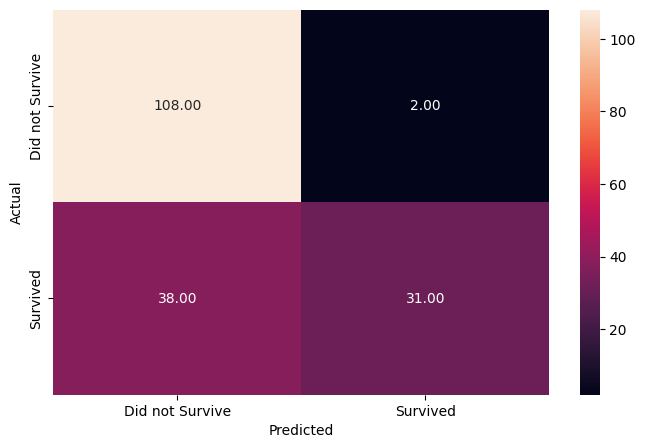

None


In [38]:
#visualizing precision, accuracy, etc.
print (metrics_score(y_test, y_pred_prune))

In [39]:
#random forest
#Building the Random Forest
rf=RandomForestClassifier(class_weight={0: 0.384, 1: 0.616},random_state=42)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       439
           1       1.00      1.00      1.00       273

    accuracy                           1.00       712
   macro avg       1.00      1.00      1.00       712
weighted avg       1.00      1.00      1.00       712



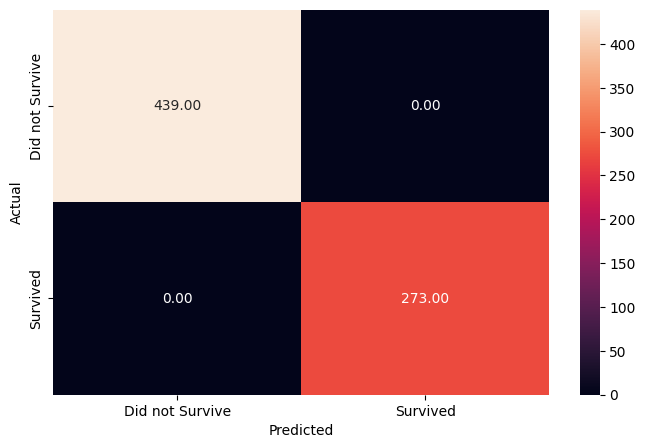

In [40]:
# Checking performance on the training data
y_pred_train_rf = rf.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       110
           1       0.75      0.71      0.73        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



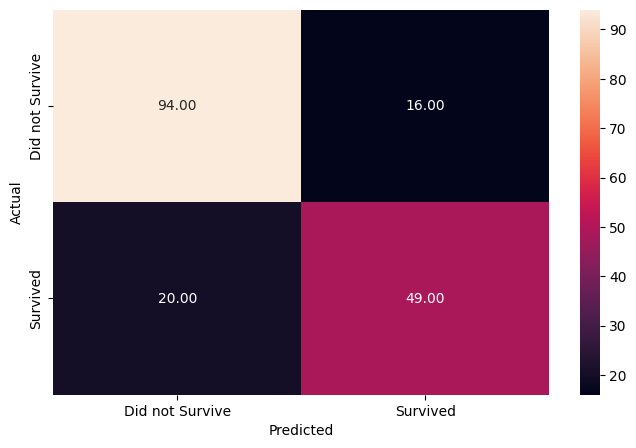

In [41]:
# Checking performance on the testing data
y_pred_test_rf = rf.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

In [42]:
#RF tuning hyperparameters
#base model
rf_prune=RandomForestClassifier(class_weight={0: 0.384, 1: 0.616},random_state=42)

In [43]:
# Define your parameter grid
param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'n_estimators': [100, 200],
}

In [44]:
# GridSearch with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf_prune,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)

In [45]:
#fitting to training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [5, 10, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [46]:
#getting the best model
best_rf = grid_search.best_estimator_

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       439
           1       0.89      0.85      0.87       273

    accuracy                           0.90       712
   macro avg       0.90      0.89      0.90       712
weighted avg       0.90      0.90      0.90       712



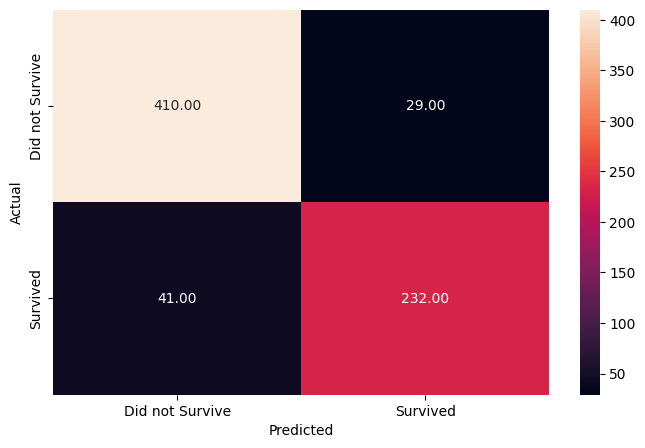

In [47]:
# Checking performance on the training data
y_pred_train_rf_prune = best_rf.predict(X_train)

metrics_score(y_train, y_pred_train_rf_prune)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       110
           1       0.77      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



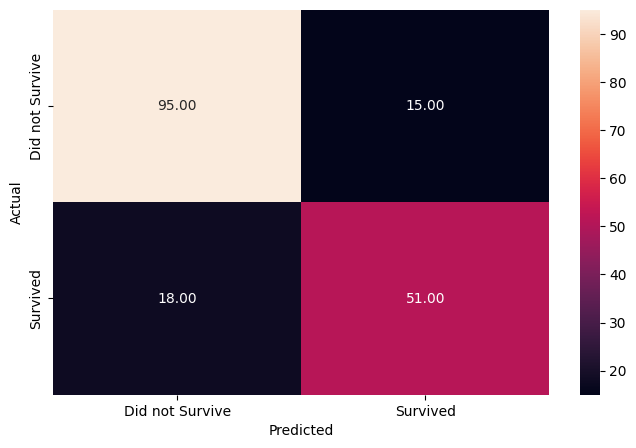

In [48]:
# Checking performance on the test data
y_pred_test_rf_prune = best_rf.predict(X_test)

metrics_score(y_test, y_pred_test_rf_prune)

**Observations**

The optimized Random Forest has the best accuracy and smallest gaps in Precision and Recall scores, while providing the least chance of overfitting. Will use this model to make predictions.

In [49]:
# Getting importances from pruned Decision Tree
importances = best_rf.feature_importances_

# If your features came from a DataFrame, use those column names:
feature_names = X_train.columns

# Zip it all together and sort:
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

       Feature  Importance
2          Sex    0.364270
6         Fare    0.190919
3          Age    0.150559
0  PassengerId    0.108774
1       Pclass    0.097020
4        SibSp    0.034959
7     Embarked    0.028924
5        Parch    0.024575


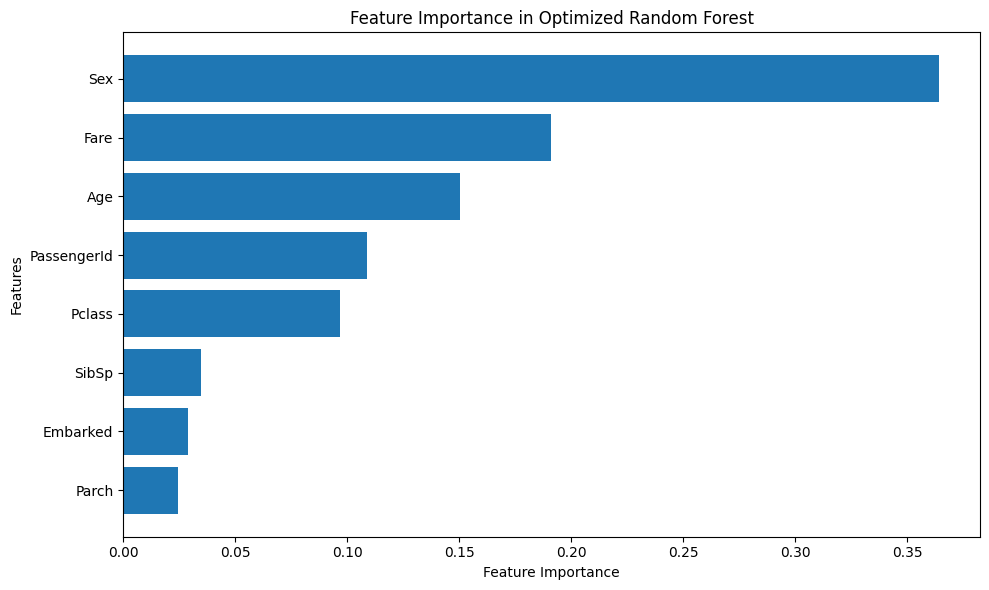

In [50]:
#visualizing importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Optimized Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [51]:
# Use the best Random Forest model to predict survival on the original data
all_predictions = best_rf.predict(X)

# Create a DataFrame with PassengerId and the predictions
predictions_all_data = pd.DataFrame({'Passenger ID': data['PassengerId'], 'Prediction (1=Survived)': all_predictions})

# Display the first few rows of the predictions
display(predictions_all_data.head())

,Passenger ID,Prediction (1=Survived)
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0


In [52]:
predictions_all_data.to_csv('Titanic_Predictions.csv', index=False)

In [53]:
import pandas as pd

# Load the CSV file
df = pd.read_csv(r'c:\Users\rober\Documents\Data Science\Code (all)\Portfolio\Kaggle projects\Titanic_Predictions_vs_Actual.csv')

# Compare Prediction and Actual columns (note the exact column names)
matches = df['Prediction (1=Survived)'] == df['Actual  (1=Survived)']

# Calculate percentage of matches
accuracy = matches.mean() * 100

# Display the result
print(f"Percentage of predicted values matching actual values: {accuracy:.2f}%")

Percentage of predicted values matching actual values: 88.44%


In [54]:
#Decision Tree predictions
# Use the best Random Forest model to predict survival on the original data
dt_all_predictions = best_clf.predict(X)

# Create a DataFrame with PassengerId and the predictions
dt_predictions_all_data = pd.DataFrame({'Passenger ID': data['PassengerId'], 'Prediction (1=Survived)': dt_all_predictions})

# Display the first few rows of the predictions
display(dt_predictions_all_data.head())


,Passenger ID,Prediction (1=Survived)
0,1,0
1,2,1
2,3,0
3,4,1
4,5,0


In [55]:
dt_predictions_all_data.to_csv('Titanic_Decision_Tree_Predictions.csv', index=False)

In [58]:
# Load the CSV file
dt_df = pd.read_csv(r'C:\Users\rober\Documents\Data Science\Code (all)\Portfolio\Kaggle projects\Titanic_Decision_Tree_Predictions.csv')

# Compare Prediction and Actual columns (note the exact column names)
dt_matches = dt_df['Prediction (1=Survived)'] == dt_df['Survived']

# Calculate percentage of matches
dt_accuracy = dt_matches.mean() * 100

# Display the result
print(f"Percentage of predicted values matching actual values (Pruned Decision Tree): {accuracy:.2f}%")

Percentage of predicted values matching actual values (Pruned Decision Tree): 88.44%


**Observations**

Decided to try the Pruned Decision Tree model for comparison's sake.set

Funny enough, both models had the same actual accuracy of 88.44% when compared to the actual survival records of the Titanic.

Will now try to improve both models.

In [ ]:
#tuning Random Forest, second try
#RF tuning hyperparameters
#base model
rf_prune=RandomForestClassifier(random_state=42)

In [63]:
# Define your parameter grid
param_grid = {
    'max_depth': [10, 15, 20, None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt'],
    'n_estimators': [500],
    'class_weight': ['balanced']
}

In [64]:
# GridSearch with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf_prune,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)

In [65]:
#fitting to training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'class_weight': ['balanced'], 'max_depth': [10, 15, ...], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 2, ...], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,500


In [66]:
#getting the best model
best_rf = grid_search.best_estimator_

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       439
           1       0.90      0.87      0.88       273

    accuracy                           0.91       712
   macro avg       0.91      0.90      0.91       712
weighted avg       0.91      0.91      0.91       712



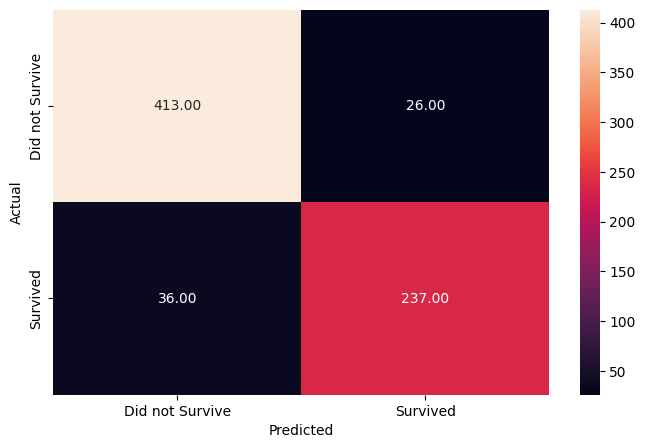

In [67]:
# Checking performance on the training data
y_pred_train_rf_prune = best_rf.predict(X_train)

metrics_score(y_train, y_pred_train_rf_prune)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       110
           1       0.79      0.75      0.77        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



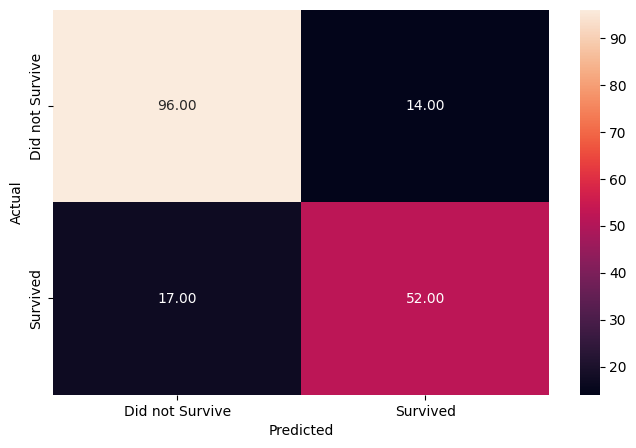

In [68]:
# Checking performance on the test data
y_pred_test_rf_prune = best_rf.predict(X_test)

metrics_score(y_test, y_pred_test_rf_prune)

**Observations**

Squeezed out a little more accuracy and higher precision and recall by tuning the parameter grid.

Mapping out RF feature importances below.

In [69]:
# Getting importances from pruned Decision Tree
importances = best_rf.feature_importances_

# If your features came from a DataFrame, use those column names:
feature_names = X_train.columns

# Zip it all together and sort:
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

       Feature  Importance
2          Sex    0.329451
6         Fare    0.178730
3          Age    0.154757
0  PassengerId    0.114368
1       Pclass    0.110457
4        SibSp    0.041681
5        Parch    0.036164
7     Embarked    0.034391


Re-pruning Decision Tree below.

In [70]:
clf = DecisionTreeClassifier(random_state=42)

param_grid = {
    'ccp_alpha': np.linspace(0, 0.02, 21),
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    clf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)
print("Best Params:", grid_search.best_params_)

Fitting 5 folds for each of 1512 candidates, totalling 7560 fits
Best Params: {'ccp_alpha': np.float64(0.004), 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [71]:
#getting test results
y_pred_prune= grid_search.predict(X_test)

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       110
           1       0.66      0.67      0.66        69

    accuracy                           0.74       179
   macro avg       0.72      0.72      0.72       179
weighted avg       0.74      0.74      0.74       179



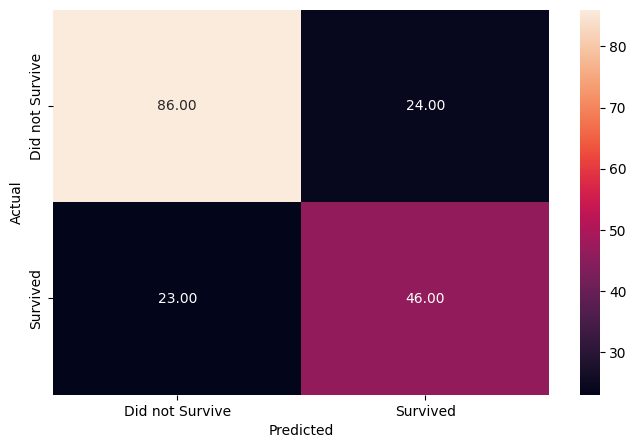

None


In [72]:
#visualizing precision, accuracy, etc.
print (metrics_score(y_test, y_pred_prune))

**Observations**

Re-pruning the Decision Tree made the accuracy go down. Will stick with re-tuned RF model and run that vs the actual survival records.

In [73]:
# Use the best Random Forest model to predict survival on the original data
rf2_predictions = best_rf.predict(X)

# Create a DataFrame with PassengerId and the predictions
rf2_predictions_all_data = pd.DataFrame({'Passenger ID': data['PassengerId'], 'Prediction (1=Survived)': rf2_predictions})

# Display the first few rows of the predictions
display(rf2_predictions_all_data.head())

,Passenger ID,Prediction (1=Survived)
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0


In [74]:
rf2_predictions_all_data.to_csv('RF2_Titanic_Predictions.csv', index=False)

In [76]:
# Load the CSV file
rf2 = pd.read_csv(r'c:\Users\rober\Documents\Data Science\Code (all)\Portfolio\Kaggle projects\RF2_Titanic_Predictions.csv')

# Compare Prediction and Actual columns (note the exact column names)
matches = rf2['Prediction (1=Survived)'] == rf2['Actual (1=Survived)']

# Calculate percentage of matches
accuracy = matches.mean() * 100

# Display the result
print(f"Percentage of predicted values matching actual values: {accuracy:.2f}%")

Percentage of predicted values matching actual values: 89.56%


**Observations**

The re-tuned Random Forest model had increased accuracy against the actual Titanic survival rate to 89.56%.